In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data from analysis
#data = pd.read_csv('data.dat', names=['s2','dm','alp','ji'], delim_whitespace=True)
data = pd.read_csv('data_grid_12x12.dat', names=['s2','dm','alp','ji'], delim_whitespace=True)


# Data from RENO collaboration
data_cl68 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl68.csv', delim_whitespace=True)
data_cl95 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl95.csv', delim_whitespace=True)
data_cl99 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl99.csv', delim_whitespace=True)

In [3]:
idx_min=data['ji'].idxmin()
idx_min

15947

In [4]:
alp_min = data['alp'][idx_min]
dm_min = data['dm'][idx_min]
s2_min = data['s2'][idx_min]
ji_min = data['ji'][idx_min]

In [5]:
ji_min

452.4856643981541

In [6]:
alp_min

1.088

In [7]:
dm_min

0.0020371428571428567

In [8]:
s2_min

0.05927977999034861

In [9]:
new_Data = data[data['alp'] == alp_min][['s2','dm','ji']]

In [10]:
new_Data['ji']=new_Data['ji'] - ji_min

In [11]:
new_Data

,s2,dm,ji
22,0.031776,0.002037,178.625948
57,0.031776,0.002074,96.160947
92,0.031776,0.002111,96.103633
127,0.031776,0.002149,96.171016
162,0.031776,0.002186,96.362424
...,...,...,...
42722,0.120000,0.003151,399.812662
42757,0.120000,0.003189,408.044852
42792,0.120000,0.003226,416.189650
42827,0.120000,0.003263,424.234262


In [12]:
dat_68 = new_Data[new_Data['ji'] <= 2.3]#[['s2','dm']]
dat_95 = new_Data[new_Data['ji'] <= 6.2]#[['s2','dm']]
dat_99 = new_Data[new_Data['ji'] <= 11.8]#[['s2','dm']]

In [13]:
new_Data.to_csv('data_plot.dat', sep=' ', header=False, index=False)

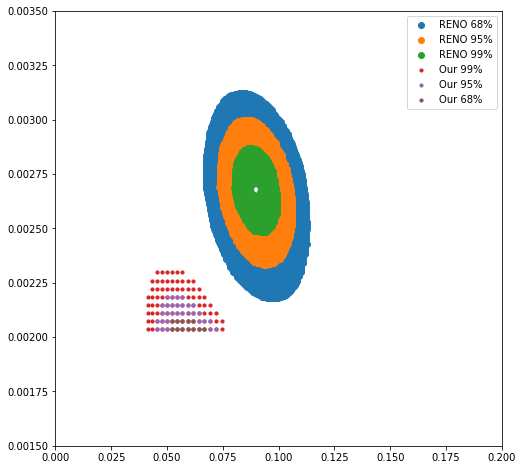

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data_cl68.s22t13, data_cl68.dmee, label='RENO 68%')
ax.scatter(data_cl95.s22t13, data_cl95.dmee, label='RENO 95%')
ax.scatter(data_cl99.s22t13, data_cl99.dmee, label='RENO 99%')
size=10
ax.scatter(dat_99.s2, dat_99.dm, s=size, label='Our 99%')
ax.scatter(dat_95.s2, dat_95.dm, s=size, label='Our 95%')
ax.scatter(dat_68.s2, dat_68.dm, s=size, label='Our 68%')

ax.set_xlim(0.0, 0.2)
#ax.set_xticks([0,0.05,0.1,0.15,0.2])

ax.set_ylim(0.0015, 0.0035)
#ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.legend()

fig.savefig("reno_best_fit_param_35x35x35_f_n_5pulls.png")
plt.show()